# Import Dependencies

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
%matplotlib inline

# Get Data

In [20]:
sunroof = pd.read_csv('data/sunroof/project-sunroof-census_tract-11182017.csv')

# EDA

In [4]:
sunroof.head()

,region_name,state_name,lat_max,lat_min,lng_max,lng_min,lat_avg,lng_avg,yearly_sunlight_kwh_kw_threshold_avg,count_qualified,...,yearly_sunlight_kwh_n,yearly_sunlight_kwh_s,yearly_sunlight_kwh_e,yearly_sunlight_kwh_w,yearly_sunlight_kwh_f,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,install_size_kw_buckets_json,carbon_offset_metric_tons,existing_installs_count
0,1097003407,Alabama,30.780640,30.715191,-88.180328,-88.225693,30.745708,-88.206818,1113.500000,2079,...,3.479725e+06,9.611835e+06,6.359187e+06,7.840463e+06,1.474834e+07,11780.694739,4.203955e+07,"[[0,446],[5,673],[10,438],[15,240],[20,121],[2...",24996.133512,4
1,1097003408,Alabama,30.749170,30.713430,-88.161057,-88.195641,30.732332,-88.173378,1113.500000,1154,...,1.960988e+06,5.900903e+06,3.107337e+06,3.476006e+06,4.694017e+06,11418.388568,1.913925e+07,"[[0,267],[5,349],[10,288],[15,155],[20,60],[25...",11379.932509,0
2,1097003501,Alabama,30.713430,30.689360,-88.144379,-88.174301,30.700678,-88.161293,1113.501267,841,...,1.019945e+06,3.259490e+06,2.358425e+06,2.402678e+06,4.181987e+06,10013.704944,1.322252e+07,"[[0,233],[5,276],[10,156],[15,82],[20,37],[25,...",7861.929101,0
3,1097003502,Alabama,30.696899,30.675949,-88.144363,-88.173798,30.684599,-88.158310,1113.500000,829,...,1.400909e+06,5.206162e+06,3.648708e+06,4.008881e+06,8.500307e+06,14245.359180,2.276497e+07,"[[0,137],[5,213],[10,176],[15,102],[20,68],[25...",13535.731997,1
4,1097003602,Alabama,30.708630,30.690220,-88.190483,-88.207710,30.699089,-88.199661,1113.500000,291,...,1.065049e+06,1.812631e+06,1.130509e+06,1.326521e+06,1.395991e+06,11647.713940,6.730700e+06,"[[0,56],[5,104],[10,56],[15,18],[20,8],[25,1],...",4001.980404,0


In [16]:
cal_sunroof = sunroof.loc[sunroof.state_name == 'California']

In [17]:
cal_sunroof.head()

,region_name,state_name,lat_max,lat_min,lng_max,lng_min,lat_avg,lng_avg,yearly_sunlight_kwh_kw_threshold_avg,count_qualified,...,yearly_sunlight_kwh_n,yearly_sunlight_kwh_s,yearly_sunlight_kwh_e,yearly_sunlight_kwh_w,yearly_sunlight_kwh_f,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,install_size_kw_buckets_json,carbon_offset_metric_tons,existing_installs_count
1880,6001400100,California,37.885250,37.849960,-122.212379,-122.246674,37.867596,-122.231903,1229.863862,956,...,1.183948e+06,4.026820e+06,3.204068e+06,4.198309e+06,4.929083e+06,11882.030884,1.754223e+07,"[[0,232],[5,323],[10,183],[15,66],[20,47],[25,...",4782.555768,143
1881,6001400200,California,37.852020,37.842609,-122.241913,-122.257919,37.848171,-122.249580,1229.950000,528,...,3.932821e+05,1.794958e+06,6.560447e+05,1.462736e+06,2.530189e+06,8199.931738,6.837210e+06,"[[0,210],[5,229],[10,53],[15,14],[20,2],[25,1]...",1864.035459,38
1882,6001400300,California,37.848511,37.834541,-122.243721,-122.265633,37.840599,-122.254440,1229.950000,1356,...,1.404627e+06,5.787867e+06,2.731708e+06,3.014379e+06,4.026218e+06,9160.206787,1.696480e+07,"[[0,435],[5,607],[10,210],[15,45],[20,17],[25,...",4625.130625,51
1883,6001400400,California,37.853580,37.841351,-122.252350,-122.261864,37.848209,-122.257462,1229.950000,916,...,4.049671e+05,3.170661e+06,1.618531e+06,3.012013e+06,2.735362e+06,9054.664014,1.094153e+07,"[[0,316],[5,380],[10,138],[15,45],[20,16],[25,...",2983.001544,47
1884,6001400500,California,37.852741,37.844139,-122.260231,-122.269691,37.848518,-122.264740,1229.950000,826,...,3.698608e+05,2.140234e+06,1.487672e+06,3.275423e+06,2.443032e+06,9092.423022,9.716222e+06,"[[0,272],[5,361],[10,128],[15,25],[20,12],[25,...",2648.943473,31


In [8]:
sunroof.state_name.value_counts()

California              7319
New York                3789
Texas                   3664
Florida                 3085
Illinois                2201
Pennsylvania            1960
Ohio                    1910
Michigan                1638
North Carolina          1362
Georgia                 1259
Arizona                 1246
New Jersey              1170
Massachusetts           1128
Washington              1120
Colorado                 945
Tennessee                934
Virginia                 924
Wisconsin                890
Minnesota                841
Indiana                  837
Missouri                 837
South Carolina           761
Alabama                  747
Louisiana                728
Maryland                 690
Connecticut              668
Oklahoma                 594
Oregon                   571
Nevada                   522
Kentucky                 492
Utah                     469
Kansas                   358
Iowa                     332
Arkansas                 310
Mississippi   

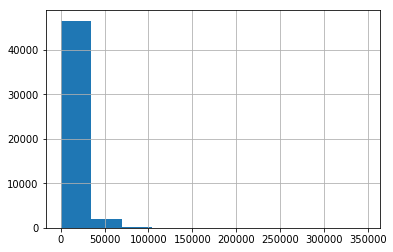

In [13]:
sunroof.d.hist()

# Load GeoJson

In [22]:
sunroof_geo = gpd.read_file('./data/sunroof/project_sunroof_census_tract.geojson')

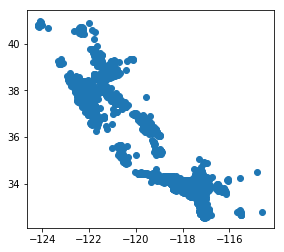

In [23]:
sunroof_geo.plot()

In [24]:
sunroof_geo.head()

,census_tract_id,state_name,lat_max,lat_min,lng_max,lng_min,lat_avg,lng_avg,yearly_sunlight_kwh_kw_threshold_avg,count_qualified,...,yearly_sunlight_kwh_s,yearly_sunlight_kwh_e,yearly_sunlight_kwh_w,yearly_sunlight_kwh_f,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,install_size_kw_buckets_json,carbon_offset_metric_tons,existing_installs_count,geometry
0,2147483647,California,37.885250,37.849960,-122.212379,-122.246674,37.867596,-122.231903,1229.863862,956,...,4.026820e+06,3.204068e+06,4.198309e+06,4.929083e+06,11882.030884,1.754223e+07,"[ [ 0, 232 ], [ 5, 323 ], [ 10, 183 ], [ 15, 6...",4782.555768,143,POINT (-122.2319030761719 37.86759567260742)
1,2147483647,California,37.852020,37.842609,-122.241913,-122.257919,37.848171,-122.249580,1229.950000,528,...,1.794958e+06,6.560447e+05,1.462736e+06,2.530189e+06,8199.931738,6.837210e+06,"[ [ 0, 210 ], [ 5, 229 ], [ 10, 53 ], [ 15, 14...",1864.035459,38,POINT (-122.2495803833008 37.84817123413085)
2,2147483647,California,37.848511,37.834541,-122.243721,-122.265633,37.840599,-122.254440,1229.950000,1356,...,5.787867e+06,2.731708e+06,3.014379e+06,4.026218e+06,9160.206787,1.696480e+07,"[ [ 0, 435 ], [ 5, 607 ], [ 10, 210 ], [ 15, 4...",4625.130625,51,POINT (-122.2544403076172 37.84059906005859)
3,2147483647,California,37.853580,37.841351,-122.252350,-122.261864,37.848209,-122.257462,1229.950000,916,...,3.170661e+06,1.618531e+06,3.012013e+06,2.735362e+06,9054.664014,1.094153e+07,"[ [ 0, 316 ], [ 5, 380 ], [ 10, 138 ], [ 15, 4...",2983.001544,47,POINT (-122.2574615478516 37.84820938110352)
4,2147483647,California,37.852741,37.844139,-122.260231,-122.269691,37.848518,-122.264740,1229.950000,826,...,2.140234e+06,1.487672e+06,3.275423e+06,2.443032e+06,9092.423022,9.716222e+06,"[ [ 0, 272 ], [ 5, 361 ], [ 10, 128 ], [ 15, 2...",2648.943473,31,POINT (-122.2647399902344 37.84851837158203)


In [ ]:
sunroof_geo

In [ ]:
census_sunroof = gpd.sjoin(cities, countries, how="inner", op='intersects')
